In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stu_vle = pd.read_csv('data/stvl_ccc14b.csv')
stu_as = pd.read_csv('data/stas_ccc14b.csv')
ass = pd.read_csv('data/ass_ccc14b.csv')
vle = pd.read_csv('data/vle_ccc14b.csv')
stu_info = pd.read_csv('data/stuinfo_ccc14b.csv')
stu_reg = pd.read_csv('data/stureg_ccc14b.csv')

# Preprocessing

#### How big is pop of interest?

In [3]:
ass.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,CCC,2014B,24286,CMA,18.0,2.0
1,CCC,2014B,24287,CMA,67.0,7.0
2,CCC,2014B,24288,CMA,137.0,8.0
3,CCC,2014B,24289,CMA,207.0,8.0
4,CCC,2014B,24282,TMA,32.0,9.0


First, drop students who withdrew in first part of course. Assessment due at day 67, but a lot of students likely dropped out very close to that due date.

In [4]:
num_wd_early = stu_reg[stu_reg.date_unregistration <= 67]['id_student'].count()
num_wd_early

610

In [5]:
num_wd_prior = stu_reg[stu_reg.date_unregistration < 0]['id_student'].count()
num_wd_prior

250

In [6]:
len(stu_reg)

1936

In [7]:
stu_reg['date_unregistration'].value_counts().sort_index()[0:70]

0.0     36
3.0      8
4.0      5
5.0      4
7.0      6
9.0      3
10.0     6
11.0     5
12.0    19
13.0     2
14.0     1
15.0     1
16.0    10
17.0     6
18.0    10
19.0     9
20.0    10
21.0     2
22.0     2
23.0     4
24.0     8
25.0     9
26.0    11
27.0     9
28.0     2
29.0     2
30.0     7
31.0    10
32.0     6
33.0    13
        ..
38.0    11
39.0     9
40.0     4
41.0     3
42.0     1
44.0    10
45.0     7
46.0     7
47.0     3
48.0     5
49.0     3
50.0     1
51.0     4
52.0     3
53.0     5
54.0     3
55.0     3
56.0     3
57.0     1
58.0     4
59.0     2
60.0     1
61.0     2
62.0     3
64.0     1
65.0     3
66.0     6
67.0    10
68.0     4
69.0     5
Name: date_unregistration, Length: 63, dtype: int64

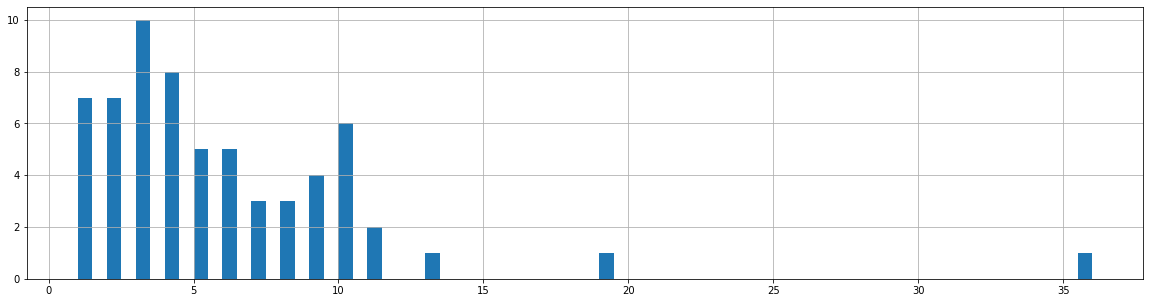

In [8]:
stu_reg['date_unregistration'].value_counts().sort_index()[0:70].hist(bins=70, figsize=(20,5))

In [9]:
print("Total students: ", len(stu_reg))
print(num_wd_prior, " withdrew before course, and ", num_wd_early, " withdrew before key assessment.")
print("Students left: ", len(stu_reg) - num_wd_prior - num_wd_early)

Total students:  1936
250  withdrew before course, and  610  withdrew before key assessment.
Students left:  1076


In [10]:
stu_reg['final_result'] = stu_reg['id_student'].map(stu_info.set_index('id_student')['final_result'])

In [11]:
stu_reg.final_result.replace(to_replace=dict(Pass=1, Distinction=1, Fail=0, Withdrawn=0), inplace=True)

In [12]:
stu_reg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result
0,CCC,2014B,28418,-37.0,NaN,0
1,CCC,2014B,29764,-34.0,NaN,1
2,CCC,2014B,29820,-57.0,NaN,1
3,CCC,2014B,40333,-30.0,17.0,0
4,CCC,2014B,40604,-17.0,NaN,1


In [13]:
len(stu_reg[(stu_reg.date_unregistration > 67) | (stu_reg.date_unregistration.isna())][stu_reg.final_result == 1])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


663

In [14]:
poi = stu_reg[(stu_reg['date_unregistration']> 67) | (stu_reg.date_unregistration.isna())]

In [15]:
poi.shape

(1326, 6)

In [16]:
poi[poi.final_result==1].shape

(663, 6)

In [17]:
663 *2

1326

In [18]:
df_stickers = stu_reg[stu_reg.date_unregistration.isna()]
df_stickers.shape

(1038, 6)

In [19]:
df_quitters = stu_reg[stu_reg.date_unregistration.isna()!=True]
df_quitters.shape

(898, 6)

In [20]:
df_quitters[df_quitters.date_unregistration > 67].shape

(288, 6)

In [21]:
df_quitters[df_quitters.date_unregistration <= 67].shape

(610, 6)

#### Drop the quitters

In [22]:
stu_reg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result
0,CCC,2014B,28418,-37.0,NaN,0
1,CCC,2014B,29764,-34.0,NaN,1
2,CCC,2014B,29820,-57.0,NaN,1
3,CCC,2014B,40333,-30.0,17.0,0
4,CCC,2014B,40604,-17.0,NaN,1


In [23]:
stu_reg.drop(stu_reg[stu_reg.date_unregistration <= 67].index, inplace=True)

In [24]:
stu_reg[stu_reg.final_result == 0].shape

(663, 6)

In [25]:
stu_reg['id_student'].nunique()

1326

In [26]:
len(stu_reg['id_student'].values)

1326

In [27]:
pop_of_interest = stu_reg['id_student'].values

In [28]:
stvl_pop = stu_vle.drop(stu_vle[~stu_vle.id_student.isin(pop_of_interest)].index)

#### Drop days after 67, and sum clicks to daily basis

In [29]:
stvl_tst = stvl_pop.drop(stvl_pop[stvl_pop.date > 67].index)

In [30]:
stvl_tst = stvl_tst.groupby(['date', 'id_student']).sum().drop('id_site', axis=1)

In [31]:
stvl_tst.head()

sum_click
date id_student           
-18  29764              13
     29820               2
     42638              20
     46605              23
     57340               1

### Make dates the features (for Random Forest)

In [32]:
stvl_piv = stvl_tst.reset_index().pivot(index='id_student', columns='date', values='sum_click')

In [33]:
stvl_piv.head()

date,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,...,58,59,60,61,62,63,64,65,66,67
id_student,,,,,,,,,,,,,,,,,,,,,
28418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,37.0,NaN,16.0
29764,13.0,15.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,44.0,9.0,5.0,30.0,NaN,6.0,82.0,NaN,103.0
29820,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,124.0,NaN,1.0,33.0,NaN
40604,NaN,NaN,4.0,9.0,NaN,NaN,9.0,NaN,24.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,89.0
42638,20.0,22.0,7.0,9.0,NaN,5.0,NaN,5.0,2.0,3.0,...,5.0,32.0,68.0,37.0,36.0,41.0,6.0,21.0,29.0,14.0


### Make students the features (for LSTM)

In [50]:
stvl_piv2 = stvl_tst.reset_index().pivot(index='date', columns='id_student', values='sum_click')

In [54]:
stvl_piv2.fillna(0, inplace=True)

In [55]:
stvl_piv2.head()

id_student,28418,29764,29820,40604,42638,45664,46605,49119,54391,57340,...,2659556,2665399,2668550,2677969,2680742,2681198,2686578,2692327,2697181,2698535
date,,,,,,,,,,,,,,,,,,,,,
-18,0.0,13.0,2.0,0.0,20.0,0.0,23.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,32.0,13.0,0.0,17.0,31.0,1.0
-17,0.0,15.0,0.0,0.0,22.0,0.0,13.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0
-16,0.0,1.0,0.0,4.0,7.0,0.0,10.0,17.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
-15,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,0.0
-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,105.0,4.0,1.0


#### Convert to diffs

In [112]:
stvl_dif2 = stvl_piv2.diff()

In [113]:
stvl_dif2.head()

id_student,28418,29764,29820,40604,42638,45664,46605,49119,54391,57340,...,2659556,2665399,2668550,2677969,2680742,2681198,2686578,2692327,2697181,2698535
date,,,,,,,,,,,,,,,,,,,,,
-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-17,0.0,2.0,-2.0,0.0,2.0,0.0,-10.0,1.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,-32.0,-13.0,0.0,13.0,-31.0,-1.0
-16,0.0,-14.0,0.0,4.0,-15.0,0.0,-3.0,16.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-30.0,5.0,0.0
-15,0.0,-1.0,0.0,5.0,2.0,0.0,-10.0,-17.0,0.0,-2.0,...,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,18.0,0.0
-14,0.0,0.0,0.0,-9.0,-9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,105.0,-19.0,1.0


In [115]:
stvl_dif2.drop([-18], inplace=True)

In [176]:
stvl_dif2.head()

id_student,28418,29764,29820,40604,42638,45664,46605,49119,54391,57340,...,2659556,2665399,2668550,2677969,2680742,2681198,2686578,2692327,2697181,2698535
date,,,,,,,,,,,,,,,,,,,,,
-17,0.0,2.0,-2.0,0.0,2.0,0.0,-10.0,1.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,-32.0,-13.0,0.0,13.0,-31.0,-1.0
-16,0.0,-14.0,0.0,4.0,-15.0,0.0,-3.0,16.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-30.0,5.0,0.0
-15,0.0,-1.0,0.0,5.0,2.0,0.0,-10.0,-17.0,0.0,-2.0,...,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,18.0,0.0
-14,0.0,0.0,0.0,-9.0,-9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,105.0,-19.0,1.0
-13,0.0,0.0,0.0,0.0,5.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-103.0,-4.0,3.0


#### Convert to numpy array, reshape into 3D for LSTM input

In [250]:
stvl_arr2 = stvl_dif2.values

In [251]:
stvl_arr2

array([[  0.,   2.,  -2., ...,  13., -31.,  -1.],
       [  0., -14.,   0., ..., -30.,   5.,   0.],
       [  0.,  -1.,   0., ...,   0.,  18.,   0.],
       ...,
       [ 32.,  76.,   1., ...,   9.,  15.,  54.],
       [-37., -82.,  32., ..., -29., -19., -54.],
       [ 16., 103., -33., ...,   0.,  -5.,   0.]])

In [252]:
stvl_arr2.shape

(85, 1299)

In [253]:
#input_arr2 = stvl_arr2.reshape(85, 1, 1299)
#input_arr2 = stvl_arr2.reshape(1, 85, 1299)
input_arr2 = stvl_arr2.reshape(1, 85, 1299)

In [254]:
input_arr2

array([[[  0.,   2.,  -2., ...,  13., -31.,  -1.],
        [  0., -14.,   0., ..., -30.,   5.,   0.],
        [  0.,  -1.,   0., ...,   0.,  18.,   0.],
        ...,
        [ 32.,  76.,   1., ...,   9.,  15.,  54.],
        [-37., -82.,  32., ..., -29., -19., -54.],
        [ 16., 103., -33., ...,   0.,  -5.,   0.]]])

#### Create targets

In [64]:
students = stvl_piv2.columns.tolist()

In [106]:
final_results = np.empty(shape=(len(students),))

In [107]:
for i, stu in enumerate(students):
    if stu_info[stu_info.id_student == stu]['final_result'].values[0] == 'Fail' or stu_info[stu_info.id_student == stu]['final_result'].values[0] == 'Withdrawn':
        final_results[i] = 0
    else:
        final_results[i] = 1

In [108]:
final_results

array([0., 1., 1., ..., 1., 1., 0.])

In [260]:
final_results.reshape(, 1299)

SyntaxError: invalid syntax (<ipython-input-260-a3677f34afa6>, line 1)

In [263]:
y_in2 = final_results.reshape((1,))

ValueError: cannot reshape array of size 1299 into shape (1,)

In [262]:
y_in2.shape

(1299,)

### Add classes - RF CONT

In [34]:
stvl_piv['final_result'] = stvl_piv.index.map(stu_info.set_index('id_student')['final_result'])

In [35]:
stvl_piv.final_result.replace(to_replace=dict(Pass=1, Distinction=1, Fail=0, Withdrawn=0), inplace=True)

In [36]:
stvl_piv.fillna(0, inplace=True)

In [37]:
stvl_piv.head()

date,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,...,59,60,61,62,63,64,65,66,67,final_result
id_student,,,,,,,,,,,,,,,,,,,,,
28418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,37.0,0.0,16.0,0
29764,13.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.0,9.0,5.0,30.0,0.0,6.0,82.0,0.0,103.0,1
29820,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,124.0,0.0,1.0,33.0,0.0,1
40604,0.0,0.0,4.0,9.0,0.0,0.0,9.0,0.0,24.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,89.0,1
42638,20.0,22.0,7.0,9.0,0.0,5.0,0.0,5.0,2.0,3.0,...,32.0,68.0,37.0,36.0,41.0,6.0,21.0,29.0,14.0,1


### Convert to diffs

In [38]:
stvl_dif = stvl_piv.diff(axis=1)

In [39]:
stvl_dif.drop(-18, axis=1, inplace=True) #drop first column which becomes all NaNs after diff

Oops, gotta put final result class back in. The diff did away with it

In [40]:
stvl_dif['final_result'] = stvl_dif.index.map(stu_info.set_index('id_student')['final_result'])

In [41]:
stvl_dif.final_result.replace(to_replace=dict(Pass=1, Distinction=1, Fail=0, Withdrawn=0), inplace=True)

In [42]:
stvl_dif.head()

date,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,...,59,60,61,62,63,64,65,66,67,final_result
id_student,,,,,,,,,,,,,,,,,,,,,
28418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,32.0,-37.0,16.0,0
29764,2.0,-14.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.0,-35.0,-4.0,25.0,-30.0,6.0,76.0,-82.0,103.0,1
29820,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,124.0,-124.0,1.0,32.0,-33.0,1
40604,0.0,4.0,5.0,-9.0,0.0,9.0,-9.0,24.0,-14.0,-3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,60.0,1
42638,2.0,-15.0,2.0,-9.0,5.0,-5.0,5.0,-3.0,1.0,-3.0,...,27.0,36.0,-31.0,-1.0,5.0,-35.0,15.0,8.0,-15.0,1


### Convert to array

In [148]:
y_in = stvl_dif['final_result'].values

In [188]:
stvl_arr1 = stvl_dif.drop(['final_result'], axis=1).values

In [215]:
stvl_arr1

array([[  0.,   0.,   0., ...,  32., -37.,  16.],
       [  2., -14.,  -1., ...,  76., -82., 103.],
       [ -2.,   0.,   0., ...,   1.,  32., -33.],
       ...,
       [ 13., -30.,   0., ...,   9., -29.,   0.],
       [-31.,   5.,  18., ...,  15., -19.,  -5.],
       [ -1.,   0.,   0., ...,  54., -54.,   0.]])

In [216]:
stvl_arr1.shape

(1299, 85)

In [264]:
#input_arr1 = stvl_arr1.reshape(1, 1299, 85)
#input_arr1 = stvl_arr1.reshape(1299, 1, 85) 
# input_arr1 = stvl_arr1.reshape(1, 1299, 85)
input_arr1 = stvl_arr1.reshape(1299, 85, 1) 

In [265]:
input_arr1

array([[[  0.],
        [  0.],
        [  0.],
        ...,
        [ 32.],
        [-37.],
        [ 16.]],

       [[  2.],
        [-14.],
        [ -1.],
        ...,
        [ 76.],
        [-82.],
        [103.]],

       [[ -2.],
        [  0.],
        [  0.],
        ...,
        [  1.],
        [ 32.],
        [-33.]],

       ...,

       [[ 13.],
        [-30.],
        [  0.],
        ...,
        [  9.],
        [-29.],
        [  0.]],

       [[-31.],
        [  5.],
        [ 18.],
        ...,
        [ 15.],
        [-19.],
        [ -5.]],

       [[ -1.],
        [  0.],
        [  0.],
        ...,
        [ 54.],
        [-54.],
        [  0.]]])

In [168]:
input_arr1.shape

(1299, 1, 85)

# Random Forest run

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [44]:
X = stvl_dif.drop(['final_result'], axis=1).values

In [45]:
y = stvl_dif['final_result'].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

In [47]:
rf_clf = RandomForestClassifier(n_estimators = 50, 
                                max_depth    =  3,
                                random_state = 21)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [48]:
rf_clf.score(X_test, y_test)

0.6984615384615385

In [49]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators    = 100, 
                              max_depth    =  5,
                              random_state = 21)
xgb_clf.fit(X_train, y_train)
xgb_clf.score(X_test, y_test)

0.6984615384615385

Wow, the boosted trees tie.

# LSTM run

In [119]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [261]:
X_tr, X_te, y_tr, y_te = train_test_split(input_arr2, y_in, random_state=21)

ValueError: Found input variables with inconsistent numbers of samples: [1, 1299]

In [198]:
model = Sequential()
model.add(LSTM(128, input_shape=(1, 85)))
model.add(Dense(1, activation='sigmoid'))

In [199]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 128)               109568    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 109,697
Trainable params: 109,697
Non-trainable params: 0
_________________________________________________________________


In [200]:
adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_model.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(X_tr, y_tr, epochs=10, batch_size=128, callbacks=[chk])

Epoch 1/10
974/974 [==============================] - 2s 3ms/step - loss: 0.6989 - acc: 0.5452
Epoch 2/10
974/974 [==============================] - 0s 79us/step - loss: 0.5715 - acc: 0.7464
Epoch 3/10
974/974 [==============================] - 0s 76us/step - loss: 0.5046 - acc: 0.8316
Epoch 4/10
974/974 [==============================] - 0s 74us/step - loss: 0.4544 - acc: 0.8860
Epoch 5/10
974/974 [==============================] - 0s 73us/step - loss: 0.4113 - acc: 0.9127
Epoch 6/10
974/974 [==============================] - 0s 74us/step - loss: 0.3731 - acc: 0.9292
Epoch 7/10
974/974 [==============================] - 0s 74us/step - loss: 0.3385 - acc: 0.9435
Epoch 8/10
974/974 [==============================] - 0s 74us/step - loss: 0.3069 - acc: 0.9579
Epoch 9/10
974/974 [==============================] - 0s 74us/step - loss: 0.2787 - acc: 0.9651
Epoch 10/10
974/974 [==============================] - 0s 75us/step - loss: 0.2536 - acc: 0.9702


In [201]:
from sklearn.metrics import accuracy_score
test_preds = model.predict_classes(X_te)
accuracy_score(y_te, test_preds)

0.6123076923076923